# Importing necessary libraries

In [1]:
import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Maleesha\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maleesha\AppData\Roaming\nltk_data...


True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


#validation
from sklearn.metrics import calinski_harabasz_score

# Loading the Data Set

In [4]:
# loading the dataset into a dataframe
data_df = pd.read_csv('../../files/personality_prediction/copy-data-final.csv')

# Data Preprocessing

In [5]:
# get the number of columns
num_columns = len(data_df.columns)

# print the number of columns
print("Number of columns:", num_columns)

Number of columns: 35


In [6]:
# select the necessary columns
data_df.drop(data_df.columns[26:], axis=1, inplace=True)

# show the first 5 rows of the new dataframe
data_df.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EST1,EST2,EST3,EST4,EST5,...,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5,country
0,4.0,1.0,5.0,2.0,5.0,1.0,4.0,4.0,2.0,2.0,...,4.0,3.0,2.0,2.0,5.0,1.0,4.0,1.0,4.0,GB
1,3.0,5.0,3.0,4.0,3.0,2.0,3.0,4.0,1.0,3.0,...,2.0,5.0,3.0,3.0,1.0,2.0,4.0,2.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,...,2.0,2.0,2.0,3.0,5.0,1.0,2.0,1.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,...,4.0,4.0,4.0,1.0,4.0,2.0,5.0,2.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,1.0,5.0,5.0,3.0,1.0,...,1.0,5.0,1.0,3.0,5.0,1.0,5.0,1.0,5.0,KE
5,3.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,2.0,2.0,...,2.0,4.0,1.0,3.0,5.0,1.0,5.0,1.0,3.0,SE
6,4.0,3.0,4.0,3.0,3.0,2.0,4.0,4.0,2.0,4.0,...,2.0,4.0,2.0,1.0,5.0,2.0,4.0,3.0,4.0,US
7,3.0,1.0,5.0,2.0,5.0,2.0,4.0,2.0,4.0,2.0,...,1.0,5.0,1.0,4.0,4.0,1.0,3.0,1.0,5.0,MY
8,2.0,2.0,3.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,...,3.0,4.0,0.0,3.0,4.0,1.0,5.0,1.0,4.0,GB
9,1.0,5.0,3.0,5.0,2.0,3.0,3.0,3.0,3.0,4.0,...,5.0,1.0,5.0,1.0,3.0,1.0,3.0,1.0,3.0,FI


In [7]:
# view the number of participants who responded to the survey
print('Number of participants: ', len(data_df))

Number of participants:  1015341


In [8]:
# handling missing values

print('Number of missing values: ', data_df.isnull().values.sum())
data_df.dropna(inplace=True)

Number of missing values:  44652


In [9]:
data_df.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EST1,EST2,EST3,EST4,EST5,...,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5,country
0,4.0,1.0,5.0,2.0,5.0,1.0,4.0,4.0,2.0,2.0,...,4.0,3.0,2.0,2.0,5.0,1.0,4.0,1.0,4.0,GB
1,3.0,5.0,3.0,4.0,3.0,2.0,3.0,4.0,1.0,3.0,...,2.0,5.0,3.0,3.0,1.0,2.0,4.0,2.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,...,2.0,2.0,2.0,3.0,5.0,1.0,2.0,1.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,...,4.0,4.0,4.0,1.0,4.0,2.0,5.0,2.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,1.0,5.0,5.0,3.0,1.0,...,1.0,5.0,1.0,3.0,5.0,1.0,5.0,1.0,5.0,KE
5,3.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,2.0,2.0,...,2.0,4.0,1.0,3.0,5.0,1.0,5.0,1.0,3.0,SE
6,4.0,3.0,4.0,3.0,3.0,2.0,4.0,4.0,2.0,4.0,...,2.0,4.0,2.0,1.0,5.0,2.0,4.0,3.0,4.0,US
7,3.0,1.0,5.0,2.0,5.0,2.0,4.0,2.0,4.0,2.0,...,1.0,5.0,1.0,4.0,4.0,1.0,3.0,1.0,5.0,MY
8,2.0,2.0,3.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,...,3.0,4.0,0.0,3.0,4.0,1.0,5.0,1.0,4.0,GB
9,1.0,5.0,3.0,5.0,2.0,3.0,3.0,3.0,3.0,4.0,...,5.0,1.0,5.0,1.0,3.0,1.0,3.0,1.0,3.0,FI


In [10]:
# save the clean data into a new csv file for future use

data_df.to_csv('../../files/personality_prediction/clean_data.csv', index=False)

In [11]:
# loading the clean dataset into a dataframe

data_df = pd.read_csv('../../files/personality_prediction/clean_data.csv')
data_df.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EST1,EST2,EST3,EST4,EST5,...,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5,country
0,4.0,1.0,5.0,2.0,5.0,1.0,4.0,4.0,2.0,2.0,...,4.0,3.0,2.0,2.0,5.0,1.0,4.0,1.0,4.0,GB
1,3.0,5.0,3.0,4.0,3.0,2.0,3.0,4.0,1.0,3.0,...,2.0,5.0,3.0,3.0,1.0,2.0,4.0,2.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,...,2.0,2.0,2.0,3.0,5.0,1.0,2.0,1.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,...,4.0,4.0,4.0,1.0,4.0,2.0,5.0,2.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,1.0,5.0,5.0,3.0,1.0,...,1.0,5.0,1.0,3.0,5.0,1.0,5.0,1.0,5.0,KE
5,3.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,2.0,2.0,...,2.0,4.0,1.0,3.0,5.0,1.0,5.0,1.0,3.0,SE
6,4.0,3.0,4.0,3.0,3.0,2.0,4.0,4.0,2.0,4.0,...,2.0,4.0,2.0,1.0,5.0,2.0,4.0,3.0,4.0,US
7,3.0,1.0,5.0,2.0,5.0,2.0,4.0,2.0,4.0,2.0,...,1.0,5.0,1.0,4.0,4.0,1.0,3.0,1.0,5.0,MY
8,2.0,2.0,3.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,...,3.0,4.0,0.0,3.0,4.0,1.0,5.0,1.0,4.0,GB
9,1.0,5.0,3.0,5.0,2.0,3.0,3.0,3.0,3.0,4.0,...,5.0,1.0,5.0,1.0,3.0,1.0,3.0,1.0,3.0,FI


In [12]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas'}


# group names and columns

EXT = [column for column in data_df if column.startswith('EXT')]
EST = [column for column in data_df if column.startswith('EST')]
AGR = [column for column in data_df if column.startswith('AGR')]
CSN = [column for column in data_df if column.startswith('CSN')]
OPN = [column for column in data_df if column.startswith('OPN')]

# Explanatory Data Analysis

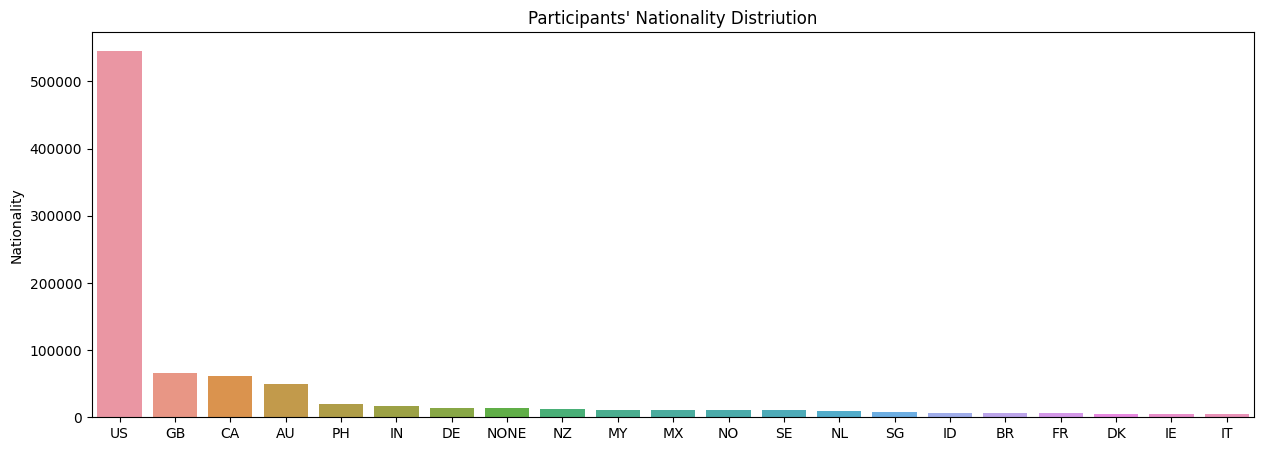

In [13]:
# Participants' Nationality Distriution

countries = pd.DataFrame(data_df['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Participants\' Nationality Distriution')
plt.ylabel('Participants');
plt.ylabel('Nationality');

In [14]:
print('Number of responses after handling missing values: ', len(data_df))

Number of responses after handling missing values:  1013481


In [15]:
# funtion to visualize the answer distribution for the questions

def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 6):
        plt.subplot(10,5,i)
        plt.hist(data_df[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Openness Personality



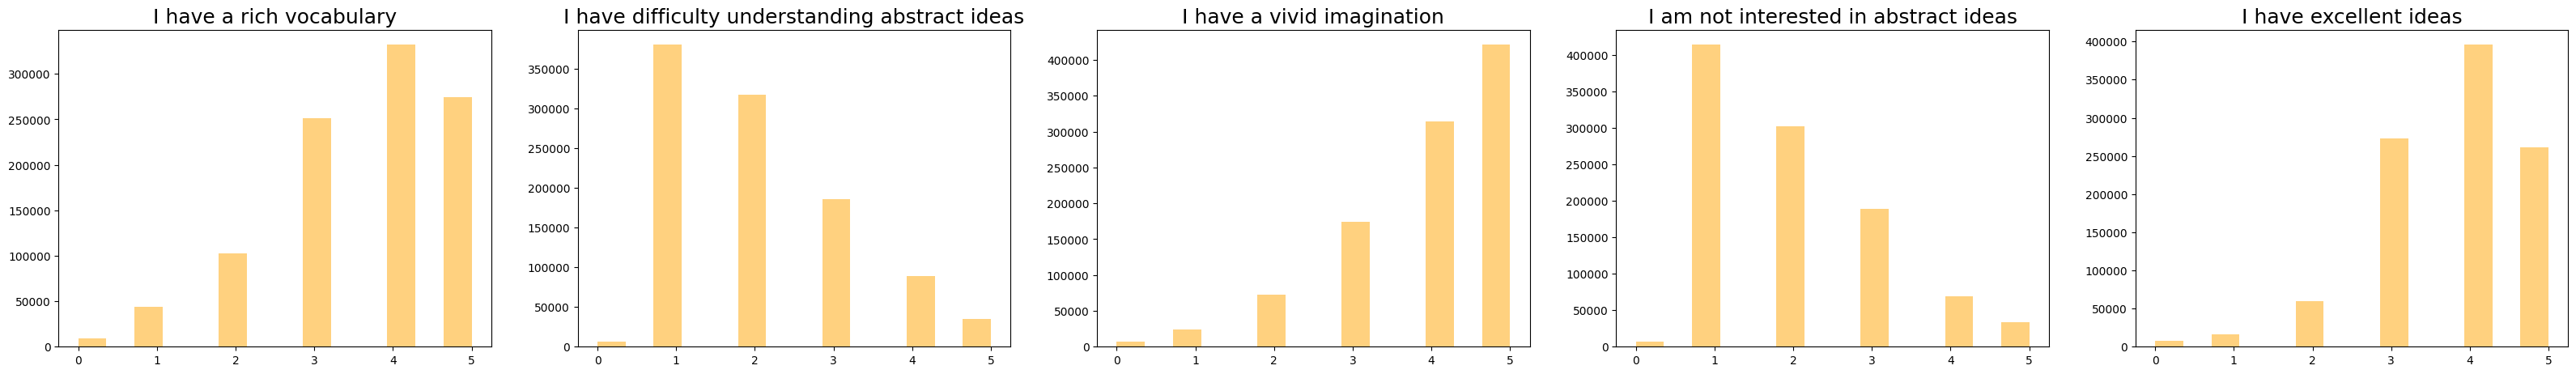

In [16]:
# OPENNESS

print('Q&As Related to Openness Personality\n')
vis_questions(OPN, opn_questions, 'orange')

Q&As Related to Conscientious Personality



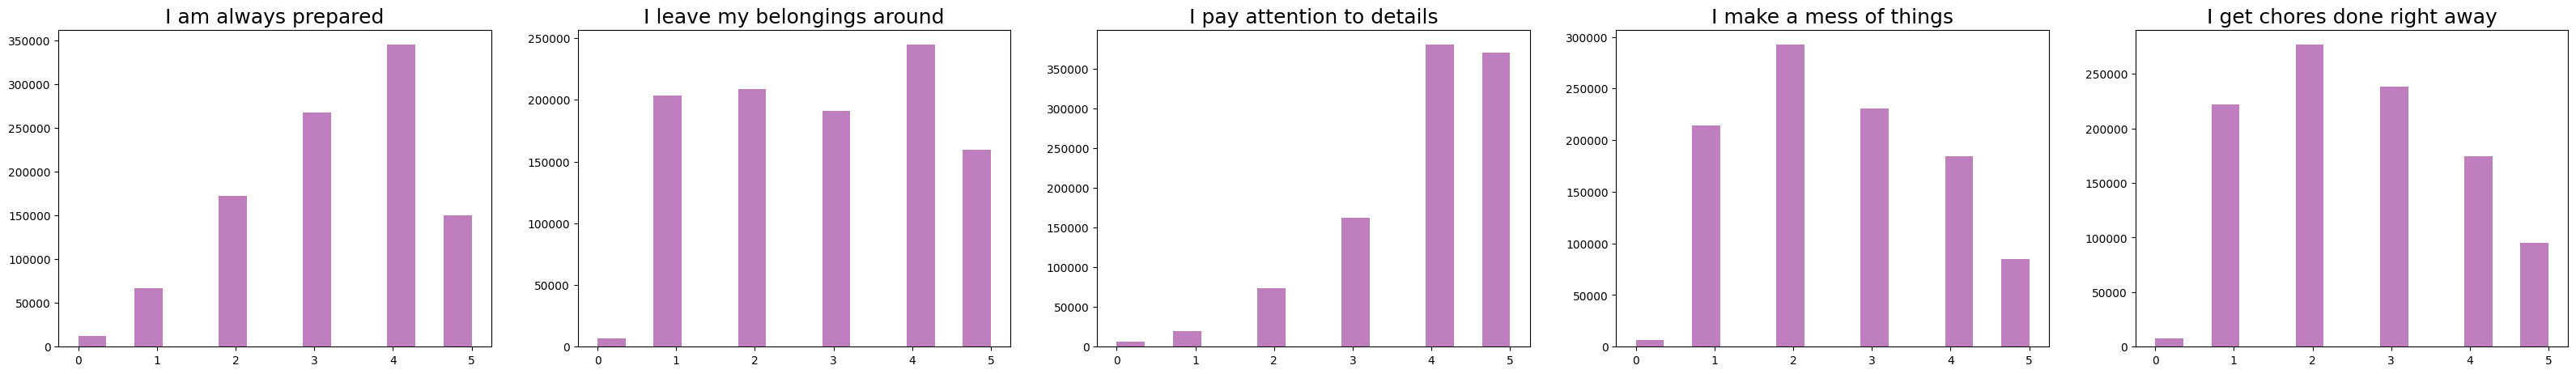

In [17]:
# CONSCIENTIOUS

print('Q&As Related to Conscientious Personality\n')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Extroversion Personality



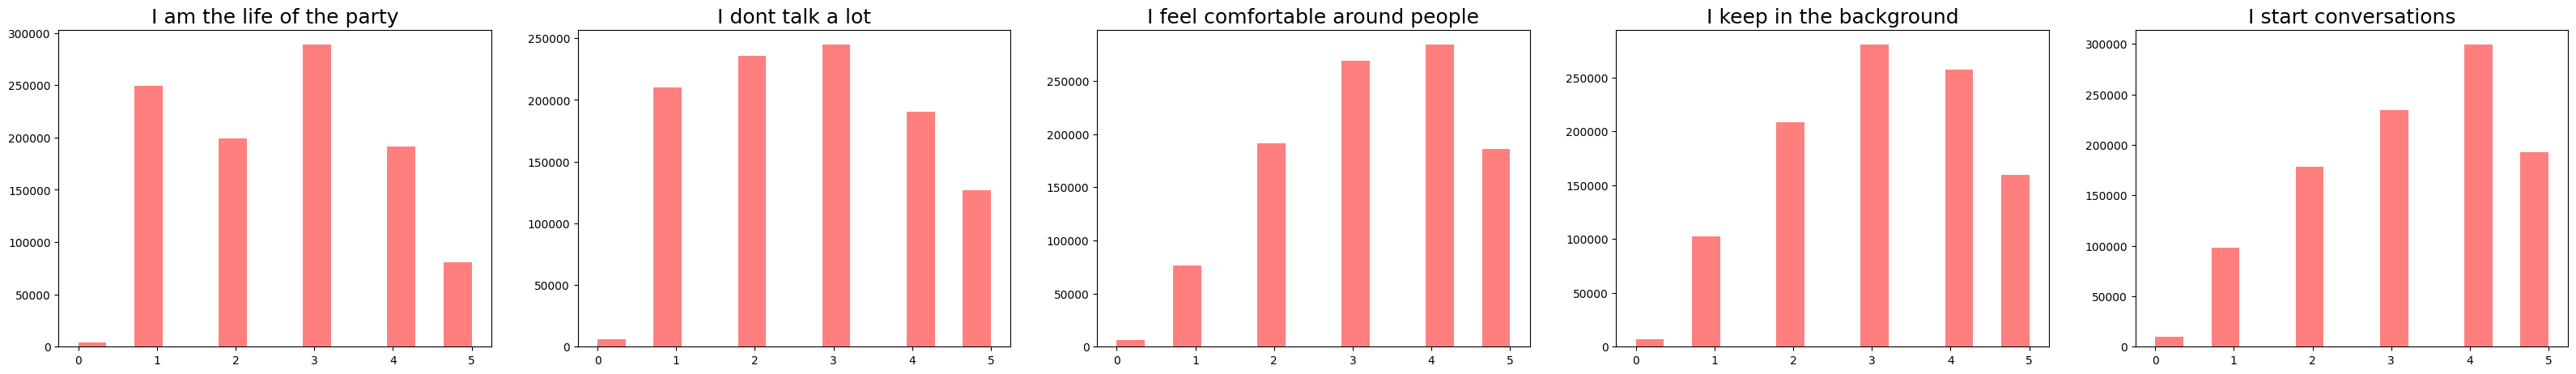

In [18]:
# EXTROVERSION

print('Q&As Related to Extroversion Personality\n')
vis_questions(EXT, ext_questions, 'red')

Q&As Related to Agreeable Personality



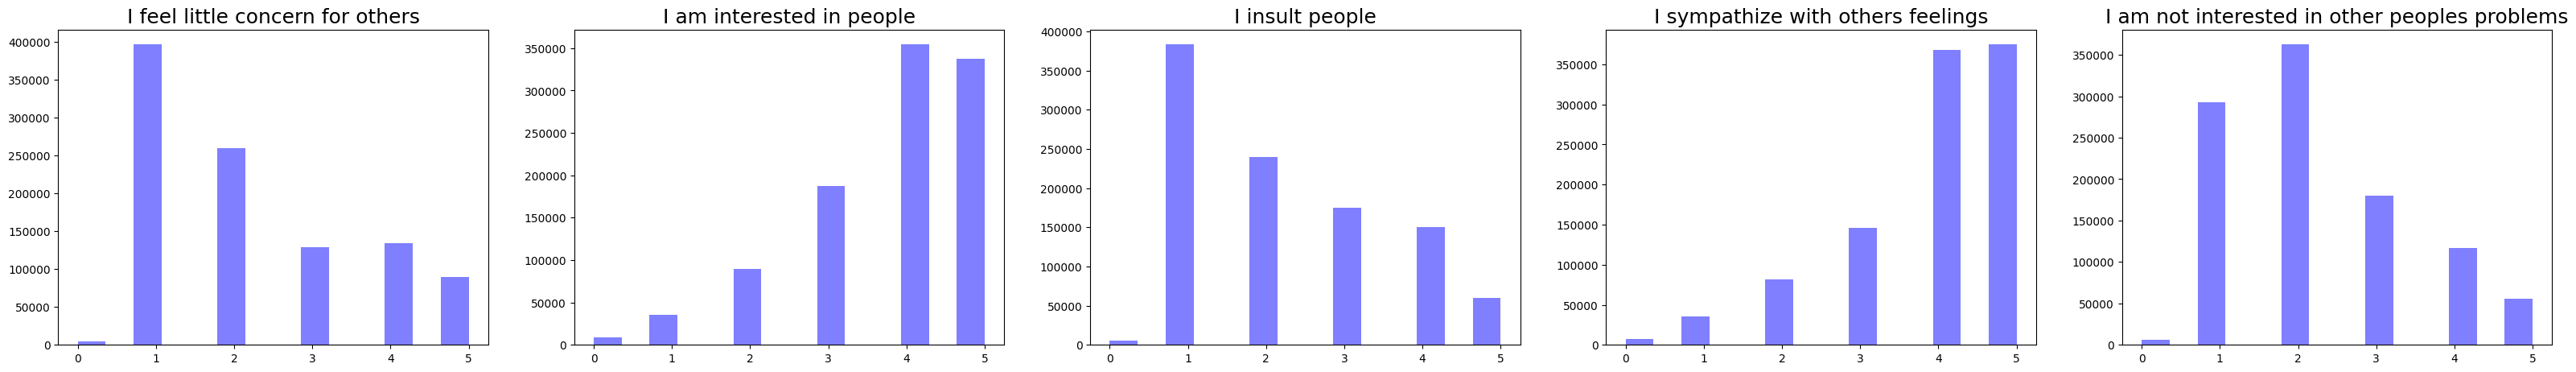

In [19]:
# AGREEABLENESS

print('Q&As Related to Agreeable Personality\n')
vis_questions(AGR, agr_questions, 'blue')

Q&As Related to Neuroticism Personality



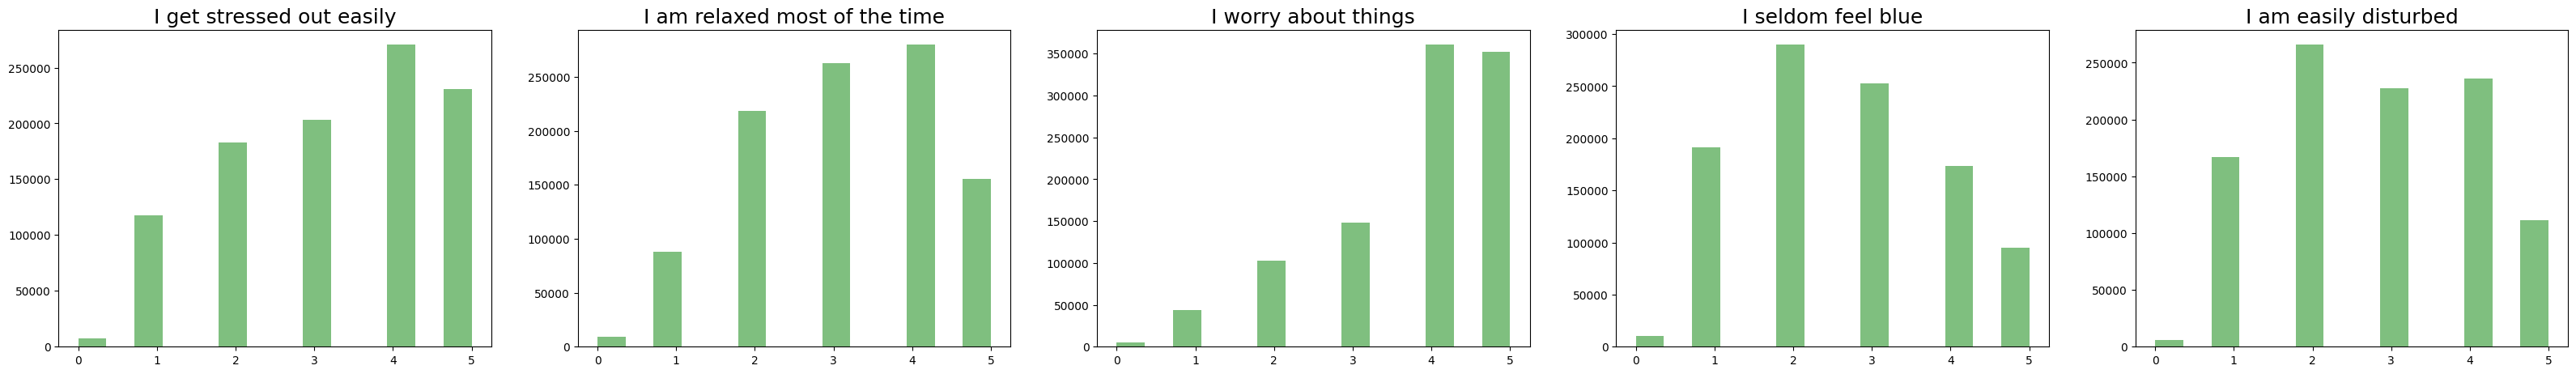

In [20]:
# NEUROTICISM

print('Q&As Related to Neuroticism Personality\n')
vis_questions(EST, est_questions, 'green')

# K-means Clustering

## Elbow Visualization

In [21]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000
from sklearn.preprocessing import MinMaxScaler

df = data_df.drop(['country'], axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

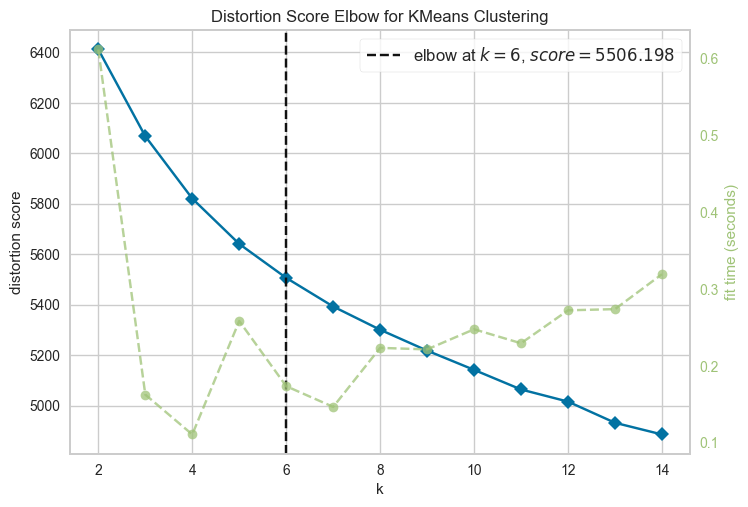

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

**As you can see 6 clusters looks optimum for the data set.**

In [23]:
# creating the K-means Cluster Model
from sklearn.cluster import KMeans

df_model = data_df.drop('country', axis=1)

# define 6 clusters and fit the model
kmeans = KMeans(n_clusters=6)
k_fit = kmeans.fit(df_model)

In [24]:
# predicting the clusters for the dataset

pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['cluster'] = predictions
df_model.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN2,OPN3,OPN4,OPN5,cluster
0,4.0,1.0,5.0,2.0,5.0,...,1.0,4.0,1.0,4.0,1
1,3.0,5.0,3.0,4.0,3.0,...,2.0,4.0,2.0,3.0,0
2,2.0,3.0,4.0,4.0,3.0,...,1.0,2.0,1.0,4.0,0
3,2.0,2.0,2.0,3.0,4.0,...,2.0,5.0,2.0,3.0,4
4,3.0,3.0,3.0,3.0,5.0,...,1.0,5.0,1.0,5.0,1
5,3.0,3.0,4.0,2.0,4.0,...,1.0,5.0,1.0,3.0,1
6,4.0,3.0,4.0,3.0,3.0,...,2.0,4.0,3.0,4.0,0
7,3.0,1.0,5.0,2.0,5.0,...,1.0,3.0,1.0,5.0,1
8,2.0,2.0,3.0,3.0,4.0,...,1.0,5.0,1.0,4.0,0
9,1.0,5.0,3.0,5.0,2.0,...,1.0,3.0,1.0,3.0,5


In [25]:
# save the cluster predictions to a csv file
df_model.to_csv('../../files/personality_prediction/cluster_predictions.csv', index=False)

Analysing the Model and Predictions

In [26]:
# get the number of individuals for each cluster

df_model.cluster.value_counts()

4    194190
1    184515
0    176367
2    167144
3    151220
5    140045
Name: cluster, dtype: int64

In [27]:
# get the average answer to the each question group for each cluster.

pd.options.display.max_columns = 75
df_model.groupby('cluster').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EST1,EST2,EST3,EST4,EST5,AGR1,AGR2,AGR3,AGR4,AGR5,CSN1,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5
cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.035647,3.336639,2.980966,3.696173,2.922627,3.776880,2.807702,4.332239,2.434928,2.931847,1.670420,3.939966,1.640369,4.370920,1.921992,3.923727,2.016834,4.375399,1.938985,3.332341,3.734809,1.981085,4.011380,1.904200,3.785453
1,3.431965,1.990001,4.350362,2.249535,4.243850,2.163288,3.920413,3.023386,3.360692,2.026963,1.849476,4.433179,1.758031,4.256938,1.847877,3.843194,2.350205,4.265296,1.732428,3.322272,3.910734,1.699986,4.068482,1.765932,4.175270
2,1.662219,3.756611,2.110127,4.183788,2.136996,4.270527,2.408127,4.542628,2.036920,3.478970,2.335208,3.363884,2.569617,3.858828,2.509471,2.673425,3.621518,3.811821,3.638240,1.866283,3.640771,2.224704,4.162094,1.970672,3.461405
3,3.087105,2.558914,3.508769,2.964932,3.526194,3.600086,3.138765,3.985630,2.890947,3.379811,3.259013,3.656527,2.591185,3.682522,2.639922,3.256249,2.804464,3.694227,2.790550,2.898254,2.798578,3.177086,3.447500,3.005938,3.400291
4,3.435769,1.799985,3.867063,2.409274,4.097369,3.672146,3.016834,4.203785,2.380524,3.073382,1.750559,4.421814,2.560302,4.314069,1.808311,2.837072,3.937834,3.830285,3.303064,1.957773,3.966801,1.805659,4.377836,1.681472,4.036073
5,1.997022,3.501960,2.642165,3.573401,2.403228,2.097212,3.757285,2.842465,2.929258,2.148738,3.047413,2.827955,2.557821,2.745575,3.225435,3.221279,2.758756,3.788882,2.285094,2.357228,3.724231,1.698947,3.775058,1.818773,3.780778


In [28]:
# get the average answer to the each question group for each response

col_list = list(df_model)
ext = col_list[0:5]
est = col_list[5:10]
agr = col_list[10:15]
csn = col_list[15:20]
opn = col_list[20:25]

data = pd.DataFrame()
data['openness'] = df_model[opn].sum(axis=1)/5
data['conscientiousness'] = df_model[csn].sum(axis=1)/5
data['extraversion'] = df_model[ext].sum(axis=1)/5
data['agreeableness'] = df_model[agr].sum(axis=1)/5
data['neuroticism'] = df_model[est].sum(axis=1)/5
data['cluster'] = predictions
data.groupby('cluster').mean()

,openness,conscientiousness,extraversion,agreeableness,neuroticism
cluster,,,,,
0,3.083385,3.117457,2.994411,2.708733,3.256719
1,3.124081,3.102679,3.253143,2.829100,2.898948
2,3.091929,3.122257,2.769948,2.927402,3.347435
3,3.165879,3.088749,3.129183,3.165834,3.399048
4,3.173568,3.173206,3.121892,2.971011,3.269334
5,2.959557,2.882248,2.823555,2.880840,2.754992


         openness  conscientiousness  extraversion  agreeableness  neuroticism
cluster                                                                       
0        3.083385           3.117457      2.994411       2.708733     3.256719
1        3.124081           3.102679      3.253143       2.829100     2.898948
2        3.091929           3.122257      2.769948       2.927402     3.347435
3        3.165879           3.088749      3.129183       3.165834     3.399048
4        3.173568           3.173206      3.121892       2.971011     3.269334
5        2.959557           2.882248      2.823555       2.880840     2.754992


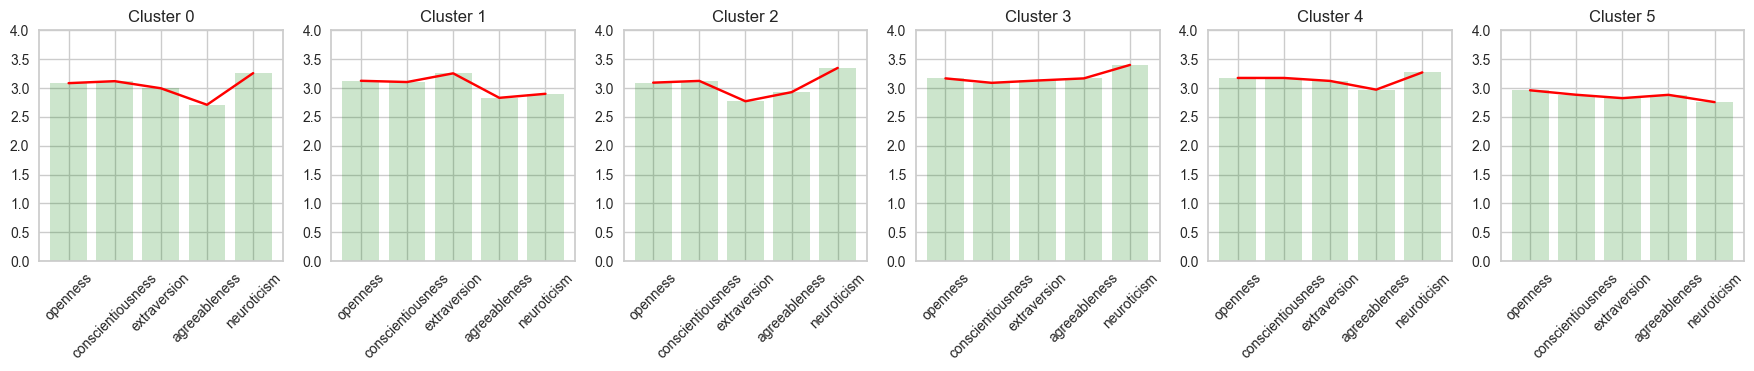

In [29]:
dataclusters = data.groupby('cluster').mean()
plt.figure(figsize=(22, 3))
for i in range(0, 6):  # as we have 6 clusters
    plt.subplot(1, 6, i + 1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i, :], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i, :], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0, 4)

print(dataclusters)


Visualizing the Clusters

In [30]:
# applying PCA to the data matrix to obtain the principal components - PCA is used for dimensionality reduction before applying k-means clustering
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = predictions
df_pca.head()

,PCA1,PCA2,cluster
0,-3.745328,1.687689,1
1,-0.289387,-3.320081,0
2,-1.247435,-2.637949,0
3,1.458433,2.318768,4
4,-4.402353,-1.932145,1


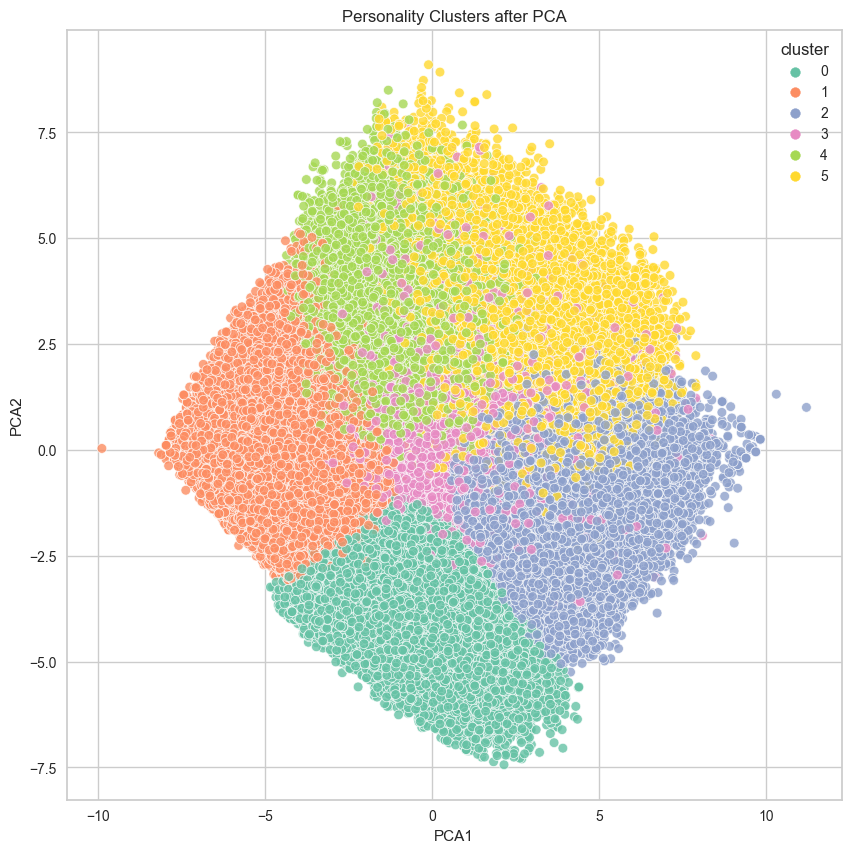

In [31]:
# visualize the five personality clusters after applying PCA

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

# Saving the model

In [32]:
import pickle
from sklearn.cluster import KMeans

# Save the model to a pickle file
with open('../../models/personality_prediction/kmeans_model.pkl', 'wb') as file:
    pickle.dump(k_fit, file)

print("K-means model saved successfully.")

K-means model saved successfully.


Testing the model

In [33]:
import pickle

# Load the model from the pickle file
model = pickle.load(open('../../models/personality_prediction/kmeans_model.pkl', 'rb'))
print(model.predict([[3,2,1,1,2,1,2,2,1,4,2,5,4,4,4,5,5,4,4,4,5,3,3,4,5]]))

[3]


c:\Users\malee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
